In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

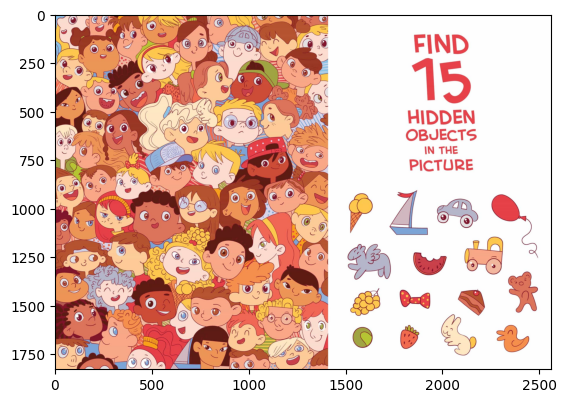

In [2]:
img = cv2.imread("finding.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

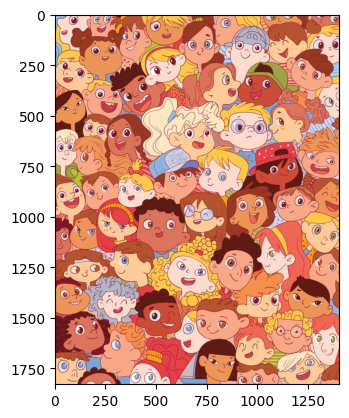

In [3]:
height, width, _ = img.shape

split_ratio = 0.55 # Thử nghiệm các giá trị [0.45, 0.50, 0.55, 0.60]
split_point = int(width * split_ratio)

img_origin = img[:, :split_point]
template = img[:, split_point:]
plt.imshow(img_origin)

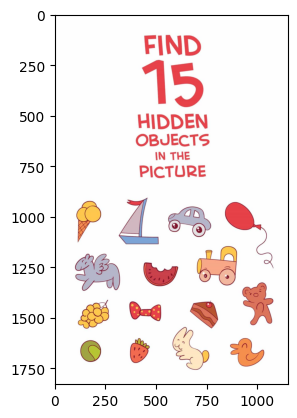

In [4]:
plt.imshow(template)

In [5]:
img_gray = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)
img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template_blurred = cv2.GaussianBlur(template_gray, (5, 5), 0)

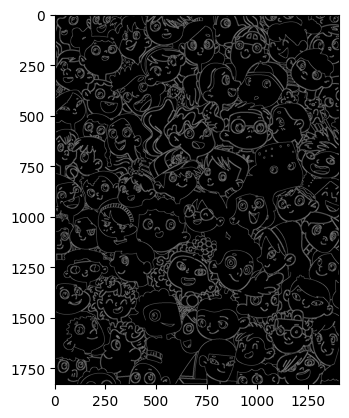

In [6]:
img_edges = cv2.Canny(img_blurred, 100, 200)
plt.imshow(img_edges, cmap = 'gray')

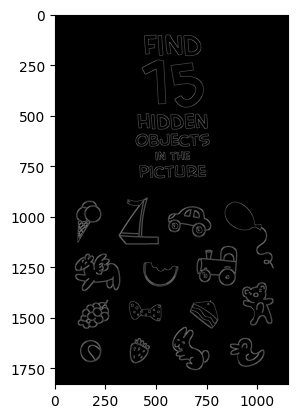

In [7]:
template_edges = cv2.Canny(template_blurred, 100, 200)
plt.imshow(template_edges, cmap = 'gray')

In [8]:

main_path = "analyst/main_img.jpg"
template_path = "analyst/template_img.jpg"

cv2.imwrite(main_path, img_origin)
cv2.imwrite(template_path, template)

True

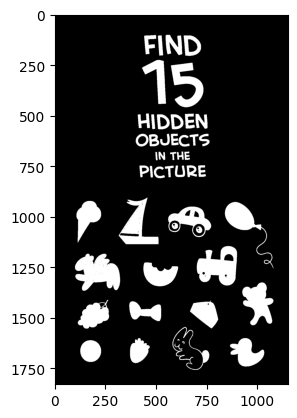

In [9]:
image_path = "analyst/template_img.jpg"
image = cv2.imread(image_path)
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')

In [10]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

MIN_Y = 800

object_coords = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if y > MIN_Y and w > 20 and h > 20:
        object_coords.append((x, y, w, h))
        
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cv2.putText(output, f"({x},{y})", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 1, cv2.LINE_AA)

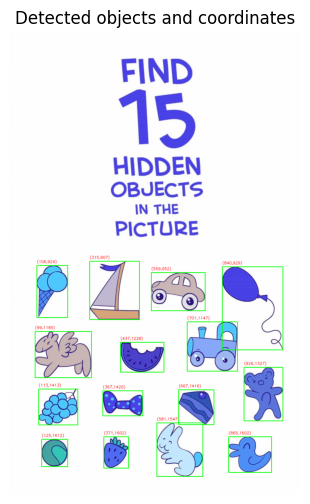

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected objects and coordinates")
plt.axis("off")
plt.show()

In [12]:
print("Coordinates of objects (x, y, w, h):")
for coord in object_coords:
    print(coord)

Coordinates of objects (x, y, w, h):
(125, 1612, 103, 108)
(865, 1602, 170, 141)
(371, 1602, 98, 124)
(581, 1547, 182, 212)
(367, 1420, 158, 99)
(667, 1416, 140, 138)
(113, 1413, 155, 142)
(926, 1327, 154, 212)
(437, 1228, 172, 118)
(99, 1185, 223, 183)
(701, 1147, 199, 195)
(559, 952, 213, 151)
(840, 929, 240, 329)
(106, 924, 122, 206)
(315, 907, 197, 231)


In [16]:
import os

image_path = "analyst/template_img.jpg"
image = cv2.imread(image_path)

coords = [
    (125, 1612, 103, 108),
    (865, 1602, 170, 141),
    (371, 1602, 98, 124),
    (581, 1547, 182, 212),
    (367, 1420, 158, 99),
    (667, 1416, 140, 138),
    (113, 1413, 155, 142),
    (926, 1327, 154, 212),
    (437, 1228, 172, 118),
    (99, 1185, 223, 183),
    (701, 1147, 199, 195),
    (559, 952, 213, 151),
    (840, 929, 240, 329),
    (106, 924, 122, 206),
    (315, 907, 197, 231)
]

output_dir = "extracted_objects"
os.makedirs(output_dir, exist_ok=True)

for idx, (x, y, w, h) in enumerate(coords):

    cropped = image[y:y+h, x:x+w]

    cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

    filename = os.path.join(output_dir, f"object_{idx+1}.png")
    cv2.imwrite(filename, cropped_gray)
    print(f"Save {filename} with coordinates: (x={x}, y={y}, w={w}, h={h})")

Save extracted_objects/object_1.png with coordinates: (x=125, y=1612, w=103, h=108)
Save extracted_objects/object_2.png with coordinates: (x=865, y=1602, w=170, h=141)
Save extracted_objects/object_3.png with coordinates: (x=371, y=1602, w=98, h=124)
Save extracted_objects/object_4.png with coordinates: (x=581, y=1547, w=182, h=212)
Save extracted_objects/object_5.png with coordinates: (x=367, y=1420, w=158, h=99)
Save extracted_objects/object_6.png with coordinates: (x=667, y=1416, w=140, h=138)
Save extracted_objects/object_7.png with coordinates: (x=113, y=1413, w=155, h=142)
Save extracted_objects/object_8.png with coordinates: (x=926, y=1327, w=154, h=212)
Save extracted_objects/object_9.png with coordinates: (x=437, y=1228, w=172, h=118)
Save extracted_objects/object_10.png with coordinates: (x=99, y=1185, w=223, h=183)
Save extracted_objects/object_11.png with coordinates: (x=701, y=1147, w=199, h=195)
Save extracted_objects/object_12.png with coordinates: (x=559, y=952, w=213, 

In [18]:
def template_matching(image_edges, template_edges):

    scales = np.arange(0.4, 2.0, 0.05) 
    best_val = -1
    best_loc = None
    best_scale = None

    for scale in scales:
        new_w = int(template_edges.shape[1] * scale)
        new_h = int(template_edges.shape[0] * scale)

        if new_w <= 0 or new_h <= 0:
            continue 

        resized_template = cv2.resize(template_edges, (new_w, new_h))

        result = cv2.matchTemplate(image_edges, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > best_val:
            best_val = max_val
            best_loc = max_loc
            best_scale = scale

    return best_loc, best_scale, best_val

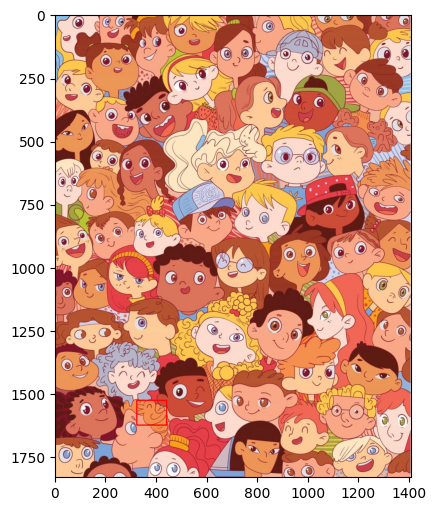

In [20]:
s_img = cv2.imread("analyst/main_img.jpg")
s_img_gray = cv2.cvtColor(s_img, cv2.COLOR_BGR2GRAY)

t_img = cv2.imread("extracted_objects/object_2.png")
t_img_gray = cv2.cvtColor(t_img, cv2.COLOR_BGR2GRAY)
 
main_edges = cv2.Canny(s_img_gray, 100, 200)
template_edges = cv2.Canny(t_img_gray, 100, 200)

best_loc, best_scale, best_val = template_matching(main_edges, template_edges)

if best_loc:
    h, w = int(t_img.shape[0] * best_scale), int(t_img.shape[1] * best_scale)
    top_left = best_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(s_img, top_left, bottom_right, (255, 0, 0), 4)

plt.figure(figsize=(6, 6))
plt.imshow(s_img)
plt.show()